## 0. Install and Import Dependencies

In [1]:
# https://pytorch.org/get-started/locally/ choose your version
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 MB 4.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached https://download.pytorch.org/whl/cpu/torchaudio-0.13.1%2Bcpu-cp310-cp310-linux_x86_64.whl (4.0 MB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached Pillow-9.3.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.3 MB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached numpy-1.24.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached urllib3-1.26.13-py2.py3-none-any.whl (140 kB)


In [2]:
!pip3 install easyocr
!pip3 install imutils
!pip install matplotlib

  Using cached easyocr-1.6.2-py3-none-any.whl (2.9 MB)
  Using cached scipy-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.7 MB)
  Using cached PyYAML-6.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (682 kB)
  Using cached python_bidi-0.4.2-py2.py3-none-any.whl (30 kB)
  Using cached shapely-2.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.3 MB)
  Using cached scikit_image-0.19.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.9 MB)
  Using cached pyclipper-1.3.0.post4-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (813 kB)
  Using cached ninja-1.11.1-py2.py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (145 kB)
  Using cached opencv_python_headless-4.5.4.60-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (47.6 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached packaging-22.0-py3-none-any.whl (42 kB)
  Using cached imageio-2.

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

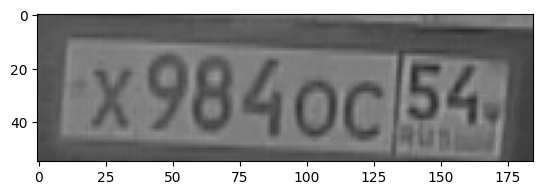

In [2]:
img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

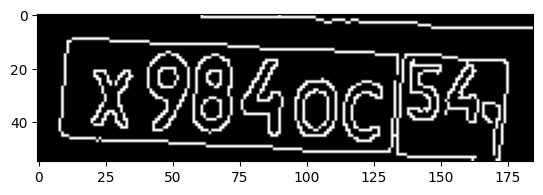

In [15]:
bfilter = cv2.bilateralFilter(gray, 11, 11, 11) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask 


In [16]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [17]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [18]:
location

In [7]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

error: OpenCV(4.5.4) /tmp/pip-req-build-4x5kub8r/opencv/modules/imgproc/src/drawing.cpp:2598: error: (-215:Assertion failed) reader.ptr != NULL in function 'cvDrawContours'


In [12]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

NameError: name 'new_image' is not defined

In [13]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

ValueError: zero-size array to reduction operation minimum which has no identity

In [14]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

NameError: name 'cropped_image' is not defined

## 4. Use Easy OCR To Read Text

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

## 5. Render Result



In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))